In [ ]:
## Variance Threshold
from sklearn.feature_selection import VarianceThreshold
data = ...
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)
# transformed data will have all columns with variance less than 0.1 removed


In [2]:
## Correlation
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
# introduce a highly correlated column
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)
# get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


Univariate feature selectionis nothing but a scoring of each feature against a given target. Mutual  information,ANOVA  F-testand chi2are some of the most popular methods for univariate feature selection. There are two ways of using these in scikit-learn. -SelectKBest: It keeps the top-k scoring features-SelectPercentile:  It  keeps  the  top  features  which  are  in  a  percentage specified by the use

In [5]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        """Custom univariate feature selection wrapper ondifferent univariate feature selection models fromscikit-learn.:
        param n_features: SelectPercentile if float else SelectKBest:
        param problem_type: classification or regression:
        param scoring: scoring function, string"""
        # for a given problem type, there are only# a few valid scoring methods# you can extend this with your own custom# methods if you wish
        if problem_type == "classification":
            valid_scoring = {"f_classif": f_classif,"chi2": chi2,"mutual_info_classif": mutual_info_classif}
        else:valid_scoring = {"f_regression": f_regression,"mutual_info_regression": mutual_info_regression}
        
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raiseException("Invalid scoring function")
            
        # if n_features is int, we use selectkbest# if n_features is float, we use selectpercentile# please note that it is int in both cases in sklearn
        if isinstance(n_features, int):
            self.selection = SelectKBest(valid_scoring[scoring],k=n_features)
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(valid_scoring[scoring],percentile=int(n_features * 100))
        else:
            raiseException("Invalid type of feature")
            
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
        
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

In [10]:
ufs = UnivariateFeatureSelction(n_features=0.5, problem_type="regression", scoring="f_regression")
ufs.fit(X, y)
X_transformed = ufs.transform(X)

In [8]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [11]:
X_transformed

array([[ 8.3252    , 41.        ,  6.98412698, 37.88      ],
       [ 8.3014    , 21.        ,  6.23813708, 37.86      ],
       [ 7.2574    , 52.        ,  8.28813559, 37.85      ],
       ...,
       [ 1.7       , 17.        ,  5.20554273, 39.43      ],
       [ 1.8672    , 18.        ,  5.32951289, 39.43      ],
       [ 2.3886    , 16.        ,  5.25471698, 39.37      ]])

In [15]:
## Greedy Feature Selection

import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

class GreedyFeatureSelection:
        """A simple and custom class for greedy feature selection.You will need to modify it quite a bit to make it suitablefor your dataset."""
        def evaluate_score(self, X, y):
            """This function evaluates model on data and returnsArea Under ROC Curve (AUC)NOTE: We fit the data and calculate AUC on same data.WE ARE OVERFITTING HERE. But this is                 also a way to achieve greedy selection.k-fold will take ktimes longer.If you want to implement it in really correct way,calculate OOF AUC and return mean AUC over k                    folds.This requires only a few lines of change and has been shown a few times in this book.:param X:training data:param y: targets:return: overfitted area under the                    roc curve"""
            # fit the logistic regression model,# and calculate AUC on same data# again: BEWARE# you can choose any model that suits your data
            model = linear_model.LogisticRegression()
            model.fit(X, y)
            predictions = model.predict_proba(X)[:, 1]
            auc = metrics.roc_auc_score(y, predictions)
            return auc
            
        def _feature_selection(self, X, y):
            """This function does the actual greedy selection:param X: data, numpy array:param y: targets, numpy array:return: (best scores, best features)"""
            # initialize good features list # and best scores to keep track of both
            good_features = []
            best_scores = []
            # calculate the number of features
            num_features = X.shape[1]
            # infinite loop
            while True:
                # initialize best feature and score of this loop
                this_feature = None
                best_score = 0
                # loop over all features
                for feature in range(num_features):
                    # if feature is already in good features,# skip this for loop
                    if feature in good_features:
                        continue
                    # selected features are all good features till now# and current feature
                    selected_features = good_features + [feature]
                    # remove all other features from data
                    xtrain = X[:, selected_features]
                    # calculate the score, in our case, AUC
                    score = self.evaluate_score(xtrain, y)
                    # if score is greater than the best score# of this loop, change best score and best feature
                    if score > best_score:
                        this_feature = feature
                        best_score = score
                
                # if we have selected a feature, add it to the good feature list and update best scores list 
                if this_feature != None:
                    good_features.append(this_feature)
                    best_scores.append(best_score)
                # if we didnt improve duringthe previous round,# exit the while loop
                if len(best_scores) > 2:
                    if best_scores[-1] < best_scores[-2]:
                        break
                # return best scores and good features# why do we remove the last data point?
            return best_scores[:-1], good_features[:-1]

        def __call__(self, X, y):
            """Call function will call the class on a set of arguments"""
            # select features, return scores and selected indices
            scores, features = self._feature_selection(X, y)
            # transform data with selected features
            return X[:, features], scores

if __name__ == "__main__":
    # generate binary classification data
    X, y = make_classification(n_samples=1000, n_features=100)
    # transform data by greedy feature selection
    X_transformed, scores = GreedyFeatureSelection()(X, y)

In [20]:
X.shape,X_transformed.shape

((1000, 100), (1000, 46))

In [25]:
# Recursive Feature Elemination

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
X= data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = LinearRegression()
# initialize RFE
rfe = RFE(estimator=model,n_features_to_select=3)
# fit RFE
rfe.fit(X, y)
# get the transformed data with# selected columns
X_transformed = rfe.transform(X)

In [22]:
X.shape,X_transformed.shape

((20640, 8), (20640, 3))

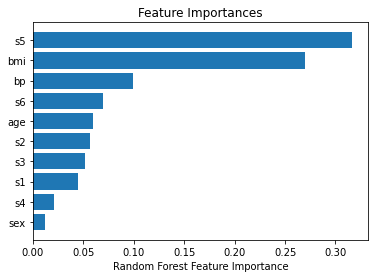

In [26]:
# Using Feature Importance from models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# fetch a regressiondataset# in diabetes data we predict diabetes progression# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

importances = model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()


In [28]:
idxs

array([1, 7, 4, 6, 5, 0, 9, 3, 2, 8], dtype=int64)

In [27]:
importances

array([0.05961954, 0.011921  , 0.26937627, 0.09919365, 0.0448917 ,
       0.0566969 , 0.05141376, 0.02124364, 0.31617544, 0.0694681 ])

In [32]:
# Using SelectFromModel

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fetch a regression dataset# in diabetes data we predict diabetes progression# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# initialize the model
model = RandomForestRegressor()
# select from the model
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)
# see which features were selected
support = sfm.get_support()
# get feature names
print([x for x, y in zip(col_names, support) if y == True])

['bmi', 's5']
